# Cervical cancer (Risk Factors)

In [1]:
import pandas as pd
import ehrapy as ep
import numpy as np
import warnings
warnings.filterwarnings("ignore")

Installed version 0.2.0 of ehrapy is newer than the latest release 0.1.0! You are running a 
nightly version and features may break!

In [2]:
pd.set_option("display.max_columns", None)

## Getting the dataset

In [3]:
!wget -nc http://archive.ics.uci.edu/ml/machine-learning-databases/00383/risk_factors_cervical_cancer.csv

File ‘risk_factors_cervical_cancer.csv’ already there; not retrieving.



# Data Wrangling

Since the dataset does not have a patient ID we add one.

In [4]:
data = pd.read_csv("risk_factors_cervical_cancer.csv",
                   sep=",")

In [5]:
data["patient_id"] = range(1, len(data) + 1)

Replace "?"(missing value) with NaN and convert from object type to numeric type

In [6]:
for att in data.columns:
    data[att].replace('?', np.NaN, inplace=True)
    data[att] = pd.to_numeric(data[att])

In [7]:
data.set_index("patient_id", inplace=True)

In [8]:
data.to_csv("risk_factors_cervical_cancer_prepared.csv")

## ehrapy sanity check

In [9]:
adata = ep.io.read_csv("risk_factors_cervical_cancer_prepared.csv",
                   index_column="patient_id")

In [10]:
adata.var_names

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

In [11]:
ep.ad.type_overview(adata)

Variable names for AnnData object with 858 obs and 36 vars
╚══ 🔓 Unencoded variables
    ╠══ Age -> data type: floating
    ╠══ Number of sexual partners -> data type: floating
    ╠══ First sexual intercourse -> data type: floating
    ╠══ Num of pregnancies -> data type: floating
    ╠══ Smokes -> data type: floating
    ╠══ Smokes (years) -> data type: floating
    ╠══ Smokes (packs/year) -> data type: floating
    ╠══ Hormonal Contraceptives -> data type: floating
    ╠══ Hormonal Contraceptives (years) -> data type: floating
    ╠══ IUD -> data type: floating
    ╠══ IUD (years) -> data type: floating
    ╠══ STDs -> data type: floating
    ╠══ STDs (number) -> data type: floating
    ╠══ STDs:condylomatosis -> data type: floating
    ╠══ STDs:cervical condylomatosis -> data type: floating
    ╠══ STDs:vaginal condylomatosis -> data type: floating
    ╠══ STDs:vulvo-perineal condylomatosis -> data type: floating
    ╠══ STDs:syphilis -> data type: floating
    ╠══ STDs:pelvic inflammatory disease -> data type: floating
    ╠══ STDs:genital herpes -> data type: floating
    ╠══ STDs:molluscum contagiosum -> data type: floating
    ╠══ STDs:AIDS -> data type: floating
    ╠══ STDs:HIV -> data type: floating
    ╠══ STDs:Hepatitis B -> data type: floating
    ╠══ STDs:HPV -> data type: floating
    ╠══ STDs: Number of diagnosis -> data type: floating
    ╠══ STDs: Time since first diagnosis -> data type: floating
    ╠══ STDs: Time since last diagnosis -> data type: floating
    ╠══ Dx:Cancer -> data type: floating
    ╠══ Dx:CIN -> data type: floating
    ╠══ Dx:HPV -> data type: floating
    ╠══ Dx -> data type: floating
    ╠══ Hinselmann -> data type: floating
    ╠══ Schiller -> data type: floating
    ╠══ Citology -> data type: floating
    ╚══ Biopsy -> data type: floating

Running KNN imputation ⠸

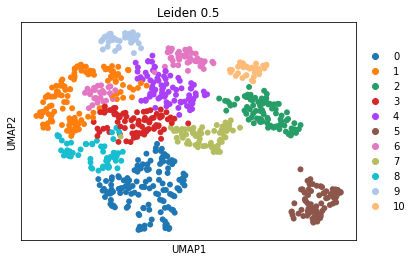

In [12]:
ep.pp.knn_impute(adata)
ep.pp.norm_scale(adata)
ep.pp.pca(adata)
ep.pp.neighbors(adata)
ep.tl.umap(adata)
ep.tl.leiden(adata, resolution=0.5, key_added="leiden_0_5")
ep.pl.umap(adata, color=["leiden_0_5"], title="Leiden 0.5")

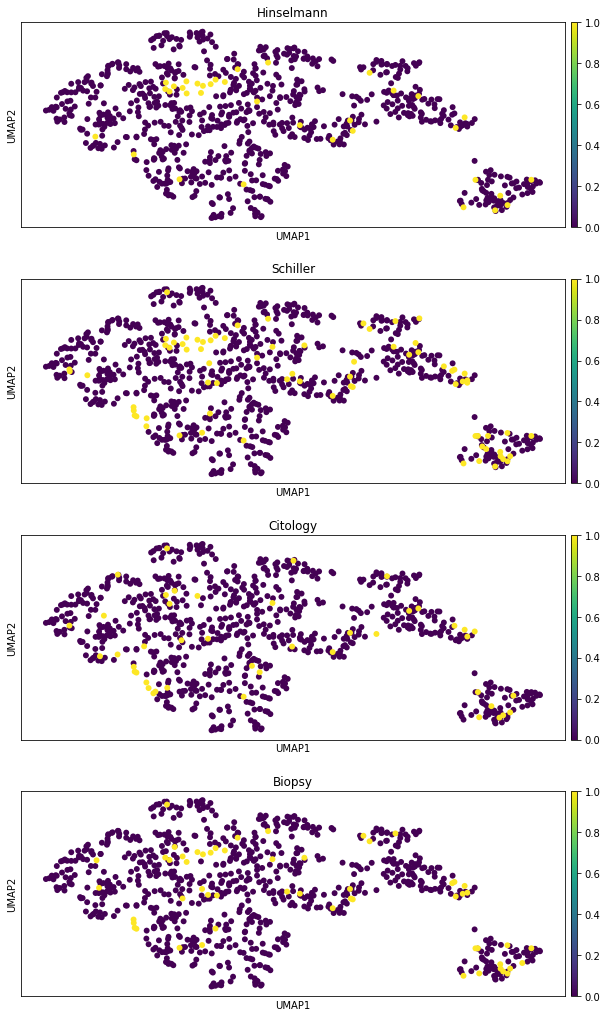

In [13]:
ep.pl.umap(adata, color=["Hinselmann", "Schiller",
           "Citology", "Biopsy"], ncols=1, wspace=0.75)